Interesting Graphs to Show For Our Data:
    

1. We want to show comparative bar graphs regarding the male to female pronoun usage between subreddits. Below is the code for the graph. 

In [4]:
!pip install nltk

     |████████████████████████████████| 1.5MB 1.1MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.4.5-cp37-none-any.whl size=1449906 sha256=55ee6a854b443af74c51115510caddf0409836534f391b9295a94409c22d968d
  Stored in directory: /home/jovyan/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk


In [1]:
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
#nltk.download('stopwords')
from nltk import punkt
from nltk import bigrams
from nltk import FreqDist
from nltk.corpus import brown
import matplotlib.pyplot as plt
#nltk.download('gutenberg')



crypto_reddit_df = pd.read_csv('data/Comments/combined-comments.csv')
pop_reddit_df = pd.read_csv('output.csv')
women_reddit_df = pd.read_csv('data/Comments/women_subreddit/Combined-Women-csv')

crypto_comments = crypto_reddit_df['comment']
pop_comments = pop_reddit_df['comment']
women_comments = women_reddit_df['comment']

crypto_nltkprep_com = crypto_comments.str.cat(sep='; ')
pop_nltkprep_com = pop_comments.str.cat(sep='; ')
women_nltkprep_com = women_comments.str.cat(sep='; ')


#We want to remove all punctuation from each word. Or else .,? would be the most frequent occurrences
tokenizer = RegexpTokenizer(r'\w+')
crypto_tokenized_text = tokenizer.tokenize(crypto_nltkprep_com)
pop_tokenized_text = tokenizer.tokenize(pop_nltkprep_com)
txt_tokenized_text = nltk.corpus.gutenberg.words('austen-emma.txt')
women_tokenized_text = tokenizer.tokenize(women_nltkprep_com)

crypto_filtered_word_freq = nltk.FreqDist(crypto_tokenized_text)
pop_filtered_word_freq = nltk.FreqDist(pop_tokenized_text)
txt_filtered_word_freq = nltk.FreqDist(txt_tokenized_text)
women_filtered_word_freq = nltk.FreqDist(women_tokenized_text)


crypto_words = crypto_filtered_word_freq.keys()
%store crypto_words
pop_words = pop_filtered_word_freq.keys()
txt_words = txt_filtered_word_freq.keys()
women_words = women_filtered_word_freq.keys()

women_dict = {
    'he':women_filtered_word_freq['he'] / len(women_tokenized_text),
    'him':women_filtered_word_freq['him']/ len(women_tokenized_text),
    'his':women_filtered_word_freq['his']/ len(women_tokenized_text),
    'she':women_filtered_word_freq['she']/ len(women_tokenized_text),
    'her':women_filtered_word_freq['her']/ len(women_tokenized_text),
    'hers':women_filtered_word_freq['hers']/ len(women_tokenized_text) 
    }

women_male = women_dict['he'] + women_dict['him'] + women_dict['his']
women_female = women_dict['she'] + women_dict['her'] + women_dict['hers']


txt_dict = {
    'he':txt_filtered_word_freq['he'] / len(txt_tokenized_text),
    'him':txt_filtered_word_freq['him']/ len(txt_tokenized_text),
    'his':txt_filtered_word_freq['his']/ len(txt_tokenized_text),
    'she':txt_filtered_word_freq['she']/ len(txt_tokenized_text),
    'her':txt_filtered_word_freq['her']/ len(txt_tokenized_text),
    'hers':txt_filtered_word_freq['hers']/ len(txt_tokenized_text) 
    }

txt_male = txt_dict['he'] + txt_dict['him'] + txt_dict['his']
txt_female = txt_dict['she'] + txt_dict['her'] + txt_dict['hers']

crypto_dict = {
    'he':crypto_filtered_word_freq['he'] / len(crypto_tokenized_text),
    'him':crypto_filtered_word_freq['him']/ len(crypto_tokenized_text),
    'his':crypto_filtered_word_freq['his']/ len(crypto_tokenized_text),
    'she':crypto_filtered_word_freq['she']/ len(crypto_tokenized_text),
    'her':crypto_filtered_word_freq['her']/ len(crypto_tokenized_text),
    'hers':crypto_filtered_word_freq['hers']/ len(crypto_tokenized_text) 
    }

crypto_male = crypto_dict['he'] + crypto_dict['him'] + crypto_dict['his']
crypto_female = crypto_dict['she'] + crypto_dict['her'] + crypto_dict['hers']

pop_dict = {
    'he':pop_filtered_word_freq['he'] / len(pop_tokenized_text),
    'him':pop_filtered_word_freq['him']/ len(pop_tokenized_text),
    'his':pop_filtered_word_freq['his']/ len(pop_tokenized_text),
    'she':pop_filtered_word_freq['she']/ len(pop_tokenized_text),
    'her':pop_filtered_word_freq['her']/ len(pop_tokenized_text),
    'hers':pop_filtered_word_freq['hers']/ len(pop_tokenized_text) 
}

pop_male = pop_dict['he'] + pop_dict['him'] + pop_dict['his']
pop_female = pop_dict['she'] + pop_dict['her'] + pop_dict['hers']


print(women_male)
print(len(women_tokenized_text))

data = {'Label': ['Male Pronoun', 'Male Pronoun', 'Male Pronoun', 'Female Pronoun', 'Female Pronoun', 'Female Pronoun'], 
        'Reddit':['Popular', 'Crypto', 'Emma', 'Popular', 'Crypto', 'Emma'], 
        'Usage Per Post': [pop_male, crypto_male, txt_male, women_male,
                           pop_female, crypto_female, txt_female, women_female]}
                                                                                              
pronouns_df = pd.DataFrame([[pop_male, pop_female], 
                            [crypto_male, crypto_female],
                            [txt_male, txt_female], 
                            [women_male, women_female]],
                           columns=['Male Pronoun', 'Female Pronoun'])

pronouns_df['Subreddit'] = ['Popular', 'Cryptocurrency', 'Emma', 'Female Subreddits']
pronouns_df = pronouns_df.set_index('Subreddit')
ax = pronouns_df.plot(kind = 'bar')
ax.set_ylabel('Usage Per Comment')


TypeError: can't pickle dict_keys objects

2. Next, we want to show the bar graphs regarding male and female gendered words and how prevalent they are. 

Text(0, 0.5, 'Usage Per Comment')

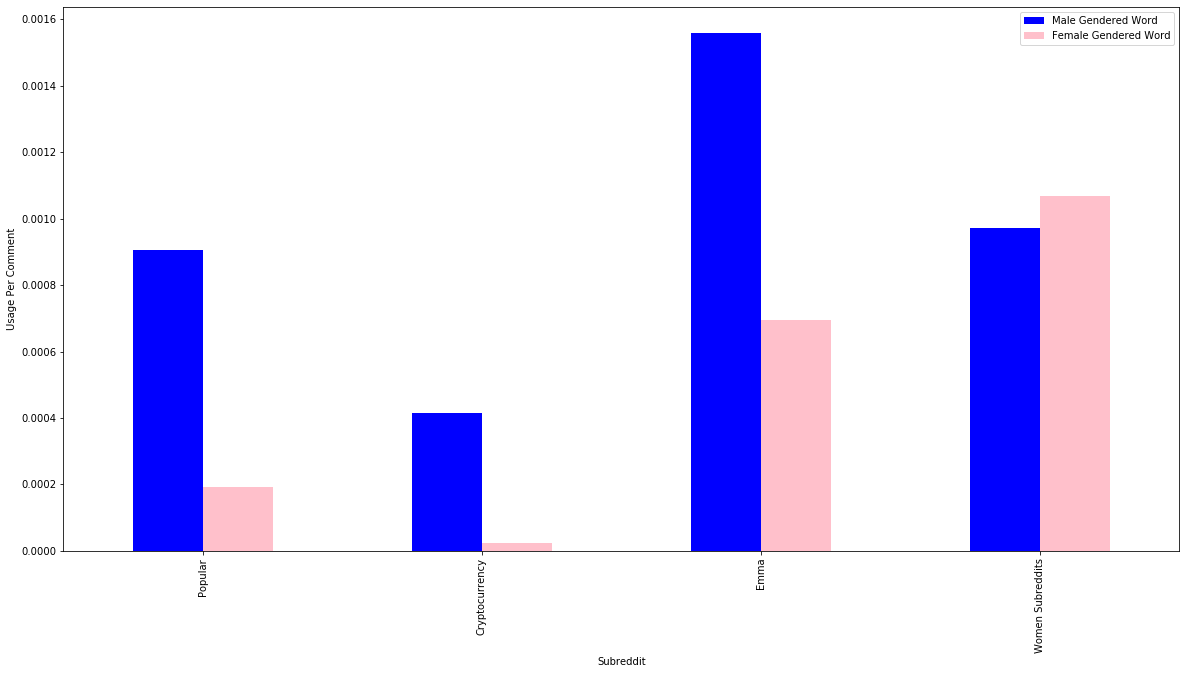

In [93]:
all_man_words = {}
male_genderness_words = {}
female_genderness_words = {}
 
gendered_word_list_m = ['man-made', 'manpower', 'mankind',  'Caveman', 'hitman','Chairman', 'mans', 'salesman', 'middleman', 'businessman', 'man', 'frontman', 'freshman', 'cameraman', 'Anchorman', 'salesman', 'fisherman', 'manmade', 'mailman', 
                        'Gentleman', 'caveman', 'plowman', 'congressman', 'manyboy', 'craftsman', 'foreman', 'Salesman', 'mankind', 'gentleman', 'tradesman', 'clergyman', 'coachman', 'coachmen', 'gentlemen', 'Gentlemen', 'workmen'
                       'horseman', 'Horseman', 'mansplaining', 'mansplainer', 'mansplain',  'manspreading', 'layman', 'manosphere', 'manly', 'silverman', 'manlihood', 'dude', 'bro']
gendered_word_list_f = ['woman', 'women', 'Women','girl','Woman','Cavewoman', 'cavewoman', 'congresswoman', 'Chairwoman', 'spokeswoman', 'gentlewoman', 'horsewoman', 'superwoman', 'womanhood', 
                       'sportswoman', 'womankind', 'Catwoman', 'womansplaining', 'womanist', 'womanly', 'womenhood', 'saleswomen', 'askwomen', 'Askwomen', 'womenz', 'women_who_have_been_successful_in_showing_their', 'unwomen', 'womenofscience', 'housewomen', 'businesswomen', 'bluecollarwomen']
    
    
def gendered_words( total_words, dict_of_words):
    for key in total_words:
        if (key[-3:] == 'man'):
            all_man_words[key] = key
        elif (key[:3] == 'man'):
            all_man_words[key] = key
    #print(all_man_words.keys())
    m_count = 0
    
    for index in gendered_word_list_m: 
        if index in dict_of_words:
            male_genderness_words[index] = dict_of_words[index]
            m_count += dict_of_words[index]

    f_count = 0
    for index in gendered_word_list_f: 
        if index in all_man_words:
            female_genderness_words[index] = dict_of_words[index]
            f_count += dict_of_words[index]
    
    return (m_count, f_count)


crypto_gen = gendered_words(crypto_filtered_word_freq.keys(), crypto_filtered_word_freq)
pop_gen = gendered_words(pop_filtered_word_freq.keys(), pop_filtered_word_freq)
txt_gen = gendered_words(txt_filtered_word_freq.keys(), txt_filtered_word_freq)
women_gen = gendered_words(women_filtered_word_freq.keys(), women_filtered_word_freq)


data = {'Label': ['Male Gendered Word', 'Male Gendered Word', 'Male Gendered Word',
                  'Female Gendered Word', 'Female Gendered Word', 'Female Gendered Word'],
        'Reddit':['Popular', 'Crypto', 'Emma', 'Popular', 'Crypto', 'Emma'], 
        'Usage Per Post': [pop_gen[0] / len(pop_tokenized_text), crypto_gen[0] / len(crypto_tokenized_text), txt_gen[0] / len(txt_tokenized_text), women_gen[0] / len(women_tokenized_text), 
                           pop_gen[1] / len(pop_tokenized_text), crypto_gen[1] / len(crypto_tokenized_text), txt_gen[1] / len(txt_tokenized_text), women_gen[1] / len(women_tokenized_text)]}

gendered_df = pd.DataFrame([[pop_gen[0] / len(pop_tokenized_text), pop_gen[1] / len(pop_tokenized_text)], 
                            [crypto_gen[0] / len(crypto_tokenized_text), crypto_gen[1] / len(crypto_tokenized_text)], 
                            [txt_gen[0] / len(txt_tokenized_text), txt_gen[1] / len(txt_tokenized_text)],
                            [women_gen[0] / len(women_tokenized_text), women_gen[1] / len(women_tokenized_text)]],
                           columns=['Male Gendered Word', 'Female Gendered Word'])

gendered_df['Subreddit'] = ['Popular', 'Cryptocurrency', 'Emma', 'Women Subreddits']
gendered_df = gendered_df.set_index('Subreddit')
ax = gendered_df.plot(kind = 'bar', color = ['b', 'pink'], figsize = [20, 10])
ax.set_ylabel('Usage Per Comment')



3. We will conduct a regression analysis in order to prove that the crypto currency reddits are statistically significant among all data. 
The analytic we will use to determine statistical significance is what percent of the female gendered words make up the male gendered


In [94]:
import statsmodels.api as sm






#X = df["RM"]
#y = target["MEDV"]

# Note the difference in argument order
#model = sm.OLS(y, X).fit()
#predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
#model.summary()

gendered_df['Percent of Male'] = gendered_df['Female Gendered Word'] / gendered_df['Male Gendered Word']
gendered_df

pronouns_df['Percent of Male'] = pronouns_df['Female Pronoun'] / pronouns_df['Male Pronoun']
pronouns_df


,Male Pronoun,Female Pronoun,Percent of Male
Subreddit,,,
Popular,0.005265,0.002287,0.434382
Cryptocurrency,0.002208,0.000206,0.093379
Emma,0.016687,0.021717,1.301464
Female Subreddits,0.007764,0.004385,0.564817
